In [3]:
#%pip install tensorflow
%pip install numpy

In [1]:

import pandas as pd
import os
import glob as gb
import tensorflow as tf
from tensorflow.keras import regularizers
import pickle

In [2]:
train_dir = os.path.join("./data/Train/")
test_dir = os.path.join("./data/Test/")
BATCH_SIZE=64

In [3]:

for folder in os.listdir(train_dir):
    files = gb.glob(pathname=str(train_dir + '/' + folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 116 in folder Blotch_Apple
For training data, found 67 in folder Normal_Apple
For training data, found 114 in folder Rot_Apple
For training data, found 82 in folder Scab_Apple


In [4]:
for folder in os.listdir(test_dir):
    files = gb.glob(pathname=str(test_dir + '/' + folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')


For testing data, found 30 in folder Blotch_Apple
For testing data, found 24 in folder Normal_Apple
For testing data, found 38 in folder Rot_Apple
For testing data, found 27 in folder Scab_Apple


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    if not target_dir.endswith(os.path.sep):
        target_dir += os.path.sep

    target_folder = os.path.join(target_dir, target_class)
    
    try:
        random_image = random.sample(os.listdir(target_folder), 1)
    except ValueError:
        print(f"No images found in the folder: {target_folder}")
        return None
    
    img_path = os.path.join(target_folder, random_image[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    
    return img

In [6]:
class_names = ['Blotch_Apple','Normal_Apple','Rot_Apple','Scab_Apple']

Image shape: (192, 262, 3)
Image shape: (100, 100, 3)
Image shape: (183, 276, 3)
Image shape: (222, 227, 3)
Image shape: (224, 225, 3)
Image shape: (280, 251, 3)
Image shape: (408, 612, 3)
Image shape: (194, 259, 3)
Image shape: (225, 225, 3)
Image shape: (1281, 1920, 3)
Image shape: (468, 640, 3)
Image shape: (468, 640, 3)
Image shape: (320, 300, 3)
Image shape: (247, 204, 3)
Image shape: (318, 450, 3)
Image shape: (320, 450, 3)
Image shape: (244, 206, 3)
Image shape: (612, 408, 3)
Image shape: (100, 100, 3)
Image shape: (470, 300, 3)
Image shape: (214, 236, 3)
Image shape: (148, 180, 3)
Image shape: (320, 450, 3)
Image shape: (320, 450, 3)
Image shape: (470, 299, 3)
Image shape: (162, 311, 3)
Image shape: (375, 500, 3)
Image shape: (214, 235, 3)
Image shape: (194, 259, 3)
Image shape: (194, 259, 3)


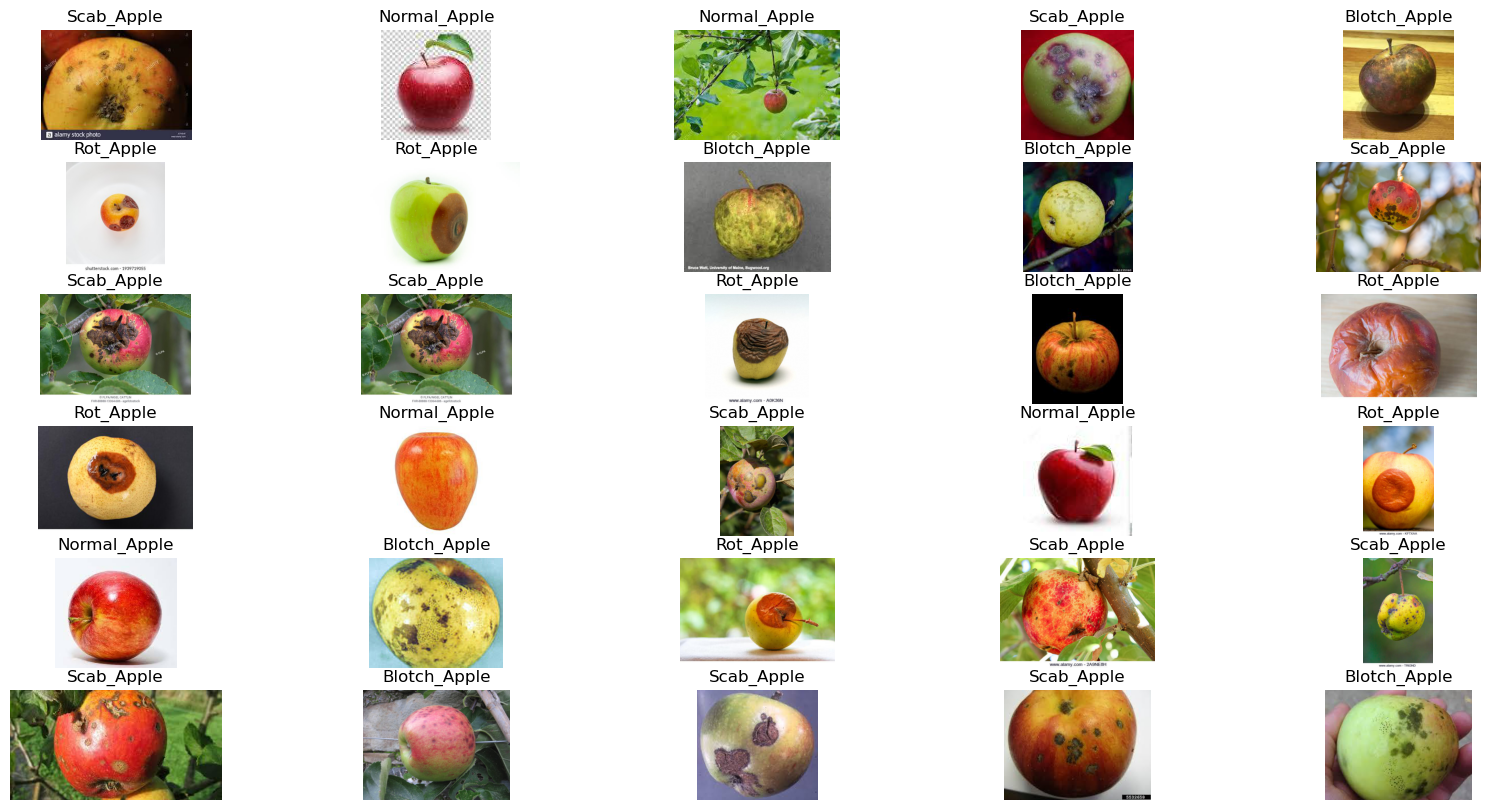

In [7]:
plt.figure(figsize=(20, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=os.path.join("./data/Train/"), target_class=class_name)
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def train_val_generators(train_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        batch_size=20,
        class_mode='categorical',
        target_size=(224, 224)
    )

    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

    validation_generator = validation_datagen.flow_from_directory(
        directory=test_dir,
        batch_size=20,
        class_mode='categorical',
        target_size=(224, 224)
    )

    return train_generator, validation_generator

In [9]:

train_generator, test_generator = train_val_generators(train_dir, test_dir)

Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


## Model-1 Architecutre


In [10]:
model_1 = tf.keras.models.Sequential([
    # First Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # First MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # Second MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D features to 1D
    tf.keras.layers.Flatten(),
    
    # Dropout layer with dropout rate of 0.5
    tf.keras.layers.Dropout(0.5),
    
    # Dense (fully connected) layer with 256 neurons
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    # Output layer with 4 neurons for multi-class classification (softmax activation)
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model with categorical crossentropy loss and RMSprop optimizer
model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print a summary of the model architecture
model_1.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_1: {}".format(len(model_1.layers)))

total_dense_neurons_1 = sum([layer.units for layer in model_1.layers if isinstance(layer, tf.keras.layers.Dense)])
print("Total number of neurons in Dense layers of model_1: {}".format(total_dense_neurons_1))


C:\Users\Sudee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,817,284 (182.41 MB)

 Trainable params: 47,816,516 (182.41 MB)

 Non-trainable params: 768 (3.00 KB)


Number of layers in model_1: 14
Total number of neurons in Dense layers of model_1: 260


## Model-2 Architecutre


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop

# Load the VGG16 model with pre-trained weights, excluding the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some VGG16 layers (for fine-tuning)
for layer in base_model.layers[-4:]:  # Unfreezing the last 4 layers for fine-tuning
    layer.trainable = True

# Add custom layers on top of the VGG16 base
model_2 = Sequential([
    base_model,
    
    # Use GlobalAveragePooling2D instead of Flatten to fix the shape issue
    GlobalAveragePooling2D(),
    
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(4, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model with categorical crossentropy loss and RMSprop optimizer
model_2.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Print a summary of the model architecture
model_2.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_2: {}".format(len(model_2.layers)))

total_dense_neurons_2 = sum([layer.units for layer in model_2.layers if isinstance(layer, Dense)])
print("Total number of neurons in Dense layers of model_2: {}".format(total_dense_neurons_2))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Number of layers in model_2: 7
Total number of neurons in Dense layers of model_2: 260


## Model-3 Architecutre


In [12]:
import tensorflow as tf

model_3 = tf.keras.models.Sequential([
    # First Convolutional layer with fewer filters
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # First MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional layer with fewer filters
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # Second MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D features to 1D
    tf.keras.layers.Flatten(),
    
    # Dropout layer with dropout rate of 0.5
    tf.keras.layers.Dropout(0.5),
    
    # Dense (fully connected) layer with fewer neurons
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    # Output layer with 4 neurons for multi-class classification (softmax activation)
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model with categorical crossentropy loss and RMSprop optimizer
model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print a summary of the model architecture
model_3.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_3: {}".format(len(model_3.layers)))

total_dense_neurons_3 = sum([layer.units for layer in model_3.layers if isinstance(layer, tf.keras.layers.Dense)])
print("Total number of neurons in Dense layers of model_3: {}".format(total_dense_neurons_3))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,955,492 (45.61 MB)

 Trainable params: 11,955,108 (45.61 MB)

 Non-trainable params: 384 (1.50 KB)


Number of layers in model_3: 14
Total number of neurons in Dense layers of model_3: 132


## Model-4 Architecture

In [13]:
model_4 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model_4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Print a summary of the model architecture
model_4.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_4: {}".format(len(model_4.layers)))

total_dense_neurons_4 = sum([layer.units for layer in model_4.layers if isinstance(layer, tf.keras.layers.Dense)])
print("Total number of neurons in Dense layers of model_4: {}".format(total_dense_neurons_4))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,983,044 (19.01 MB)

 Trainable params: 4,983,044 (19.01 MB)

 Non-trainable params: 0 (0.00 B)


Number of layers in model_4: 12
Total number of neurons in Dense layers of model_4: 516


## Model-5 Architecure

In [14]:
from tensorflow.keras.optimizers import Adam

model_5 = tf.keras.models.Sequential([
    # First Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # First MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # Second MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D features to 1D
    tf.keras.layers.Flatten(),
    
    # Dropout layer with dropout rate of 0.5
    tf.keras.layers.Dropout(0.5),
    
    # Dense (fully connected) layer with 256 neurons
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    # Output layer with 4 neurons for multi-class classification (softmax activation)
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model_5.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print a summary of the model architecture
model_5.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_5: {}".format(len(model_5.layers)))

total_dense_neurons_5 = sum([layer.units for layer in model_5.layers if isinstance(layer, tf.keras.layers.Dense)])
print("Total number of neurons in Dense layers of model_5: {}".format(total_dense_neurons_5))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,817,284 (182.41 MB)

 Trainable params: 47,816,516 (182.41 MB)

 Non-trainable params: 768 (3.00 KB)


Number of layers in model_5: 14
Total number of neurons in Dense layers of model_5: 260


## Model-6 Architecture

In [15]:
from tensorflow.keras.optimizers import Nadam

model_6 = tf.keras.models.Sequential([
    # First Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # First MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # Second MaxPooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D features to 1D
    tf.keras.layers.Flatten(),
    
    # Dropout layer with dropout rate of 0.5
    tf.keras.layers.Dropout(0.5),
    
    # Dense (fully connected) layer with 256 neurons
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    # Output layer with 4 neurons for multi-class classification (softmax activation)
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Nadam optimizer
model_6.compile(
    loss='categorical_crossentropy',
    optimizer=Nadam(learning_rate=0.002),
    metrics=['accuracy']
)

# Print a summary of the model architecture
model_6.summary()

# Print additional information about the model architecture
print("\nNumber of layers in model_6: {}".format(len(model_6.layers)))

total_dense_neurons_6 = sum([layer.units for layer in model_6.layers if isinstance(layer, tf.keras.layers.Dense)])
print("Total number of neurons in Dense layers of model_6: {}".format(total_dense_neurons_6))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,817,284 (182.41 MB)

 Trainable params: 47,816,516 (182.41 MB)

 Non-trainable params: 768 (3.00 KB)


Number of layers in model_6: 14
Total number of neurons in Dense layers of model_6: 260


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_info_1 = model_1.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75


C:\Users\Sudee\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5211 - loss: 1.8464 - val_accuracy: 0.3250 - val_loss: 1.6656
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.6345 - loss: 0.9362 - val_accuracy: 0.4583 - val_loss: 1.8006
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.6230 - loss: 0.8926 - val_accuracy: 0.2500 - val_loss: 2.1032
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6572 - loss: 0.9952 - val_accuracy: 0.3167 - val_loss: 2.0486
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.7366 - loss: 0.7291 - val_accuracy: 0.3083 - val_loss: 2.1280
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6902 - loss: 0.7852 - val_accuracy: 0.3333 - val_loss: 2.2637
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.7505 - loss: 0.6700 - val_accuracy: 0.3000 - val_loss: 2.6263
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.7008 - loss: 0.6953 - val_accuracy: 0.2500 - val_loss: 2.8991
Epo

In [20]:
with open('weights/model_1_history.pkl', 'wb') as file:
    pickle.dump(model_info_1.history, file)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_info_2 = model_2.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 176s 8s/step - accuracy: 0.3268 - loss: 1.6615 - val_accuracy: 0.1917 - val_loss: 5.3924
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.4021 - loss: 1.4349 - val_accuracy: 0.2417 - val_loss: 3.4752
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.3918 - loss: 1.3705 - val_accuracy: 0.2917 - val_loss: 1.6285
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.4544 - loss: 1.2979 - val_accuracy: 0.3083 - val_loss: 1.4563
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.4580 - loss: 1.2757 - val_accuracy: 0.2750 - val_loss: 1.8731
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.4535 - loss: 1.1805 - val_accuracy: 0.2667 - val_loss: 1.8777
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 166s 9s/step - accuracy: 0.4629 - loss: 1.2806 - val_accuracy: 0.4250 - val_loss: 1.2409
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 164s 8s/step - accuracy: 0.4340 - loss: 1.2265 - val_accuracy: 0.4167 - v

In [22]:
with open('weights/model_2_history.pkl', 'wb') as file:
    pickle.dump(model_info_2.history, file)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_info_3 = model_3.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4476 - loss: 1.7259 - val_accuracy: 0.3167 - val_loss: 1.8339
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 905ms/step - accuracy: 0.6553 - loss: 0.9498 - val_accuracy: 0.2833 - val_loss: 1.7233
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 900ms/step - accuracy: 0.6505 - loss: 0.8849 - val_accuracy: 0.3167 - val_loss: 1.7921
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 909ms/step - accuracy: 0.6785 - loss: 0.8227 - val_accuracy: 0.3750 - val_loss: 1.6013
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 912ms/step - accuracy: 0.6558 - loss: 0.8995 - val_accuracy: 0.3917 - val_loss: 1.7327
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 894ms/step - accuracy: 0.6381 - loss: 0.8290 - val_accuracy: 0.3000 - val_loss: 1.8927
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 901ms/step - accuracy: 0.6827 - loss: 0.9113 - val_accuracy: 0.3750 - val_loss: 1.9351
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 965ms/step - accuracy: 0.7240 - loss: 0.7280 - val_accurac

In [24]:
with open('weights/model_3_history.pkl', 'wb') as file:
    pickle.dump(model_info_3.history, file)

In [18]:
model_info_4 = model_4.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75


C:\Users\Sudee\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.3006 - loss: 2.9683 - val_accuracy: 0.3583 - val_loss: 1.3654
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.3155 - loss: 1.4121 - val_accuracy: 0.4500 - val_loss: 1.3336
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3777 - loss: 1.3630 - val_accuracy: 0.4917 - val_loss: 1.2536
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4463 - loss: 1.3296 - val_accuracy: 0.5833 - val_loss: 1.0943
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5556 - loss: 1.1527 - val_accuracy: 0.5167 - val_loss: 1.0861
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5357 - loss: 1.1848 - val_accuracy: 0.4500 - val_loss: 1.4569
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5379 - loss: 1.1033 - val_accuracy: 0.4583 - val_loss: 1.2577
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5134 - loss: 1.1143 - val_accuracy: 0.5583 - val_loss: 1.0134
Epo

In [19]:
with open('weights/model_4_history.pkl', 'wb') as file:
    pickle.dump(model_info_4.history, file)

In [27]:
model_info_5 = model_5.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.4744 - loss: 1.9034 - val_accuracy: 0.2833 - val_loss: 1.7777
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.6246 - loss: 0.9580 - val_accuracy: 0.4333 - val_loss: 1.4824
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6523 - loss: 0.8909 - val_accuracy: 0.2917 - val_loss: 1.9146
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6475 - loss: 0.8323 - val_accuracy: 0.2500 - val_loss: 2.1301
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6487 - loss: 0.8800 - val_accuracy: 0.2500 - val_loss: 2.1543
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6983 - loss: 0.7546 - val_accuracy: 0.2500 - val_loss: 2.4153
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.6696 - loss: 0.7855 - val_accuracy: 0.2750 - val_loss: 1.8619
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.7248 - loss: 0.7116 - val_accuracy: 0.2500 - val_loss:

In [28]:
with open('weights/model_5_history.pkl', 'wb') as file:
    pickle.dump(model_info_5.history, file)

In [29]:
model_info_6 = model_6.fit(
    train_generator,
    epochs=75,
    batch_size=BATCH_SIZE,
    validation_data=test_generator
)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4766 - loss: 1.5921 - val_accuracy: 0.3583 - val_loss: 1.7980
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.6941 - loss: 0.9001 - val_accuracy: 0.4917 - val_loss: 1.3912
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.7276 - loss: 0.7402 - val_accuracy: 0.4000 - val_loss: 1.8456
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7151 - loss: 0.7943 - val_accuracy: 0.3917 - val_loss: 1.9511
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.6312 - loss: 0.9469 - val_accuracy: 0.5167 - val_loss: 1.5307
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.6575 - loss: 0.8574 - val_accuracy: 0.4750 - val_loss: 1.8441
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.5749 - loss: 0.9334 - val_accuracy: 0.4417 - val_loss: 1.6715
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.6531 - loss: 0.8903 - val_accuracy: 0.2583 - val_loss:

In [30]:
with open('weights/model_6_history.pkl', 'wb') as file:
    pickle.dump(model_info_6.history, file)

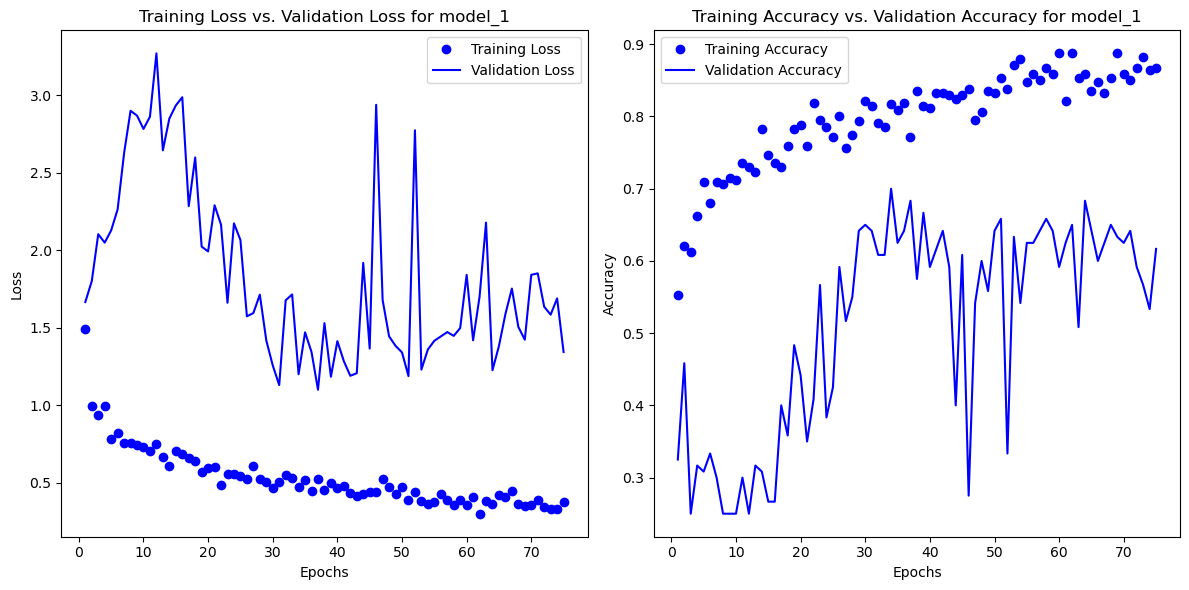

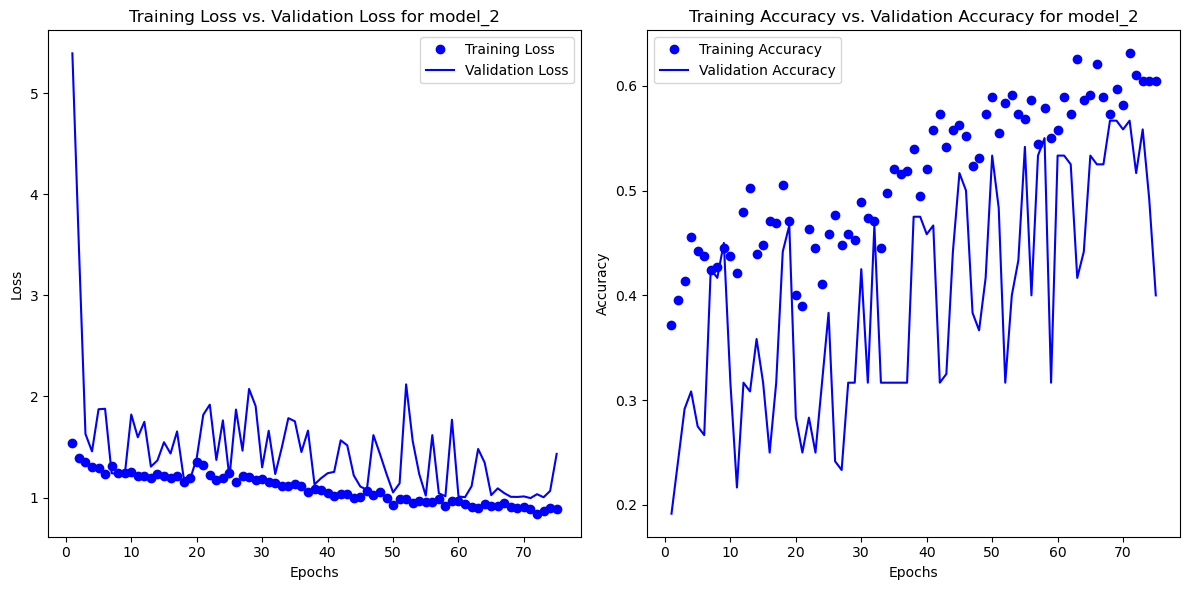

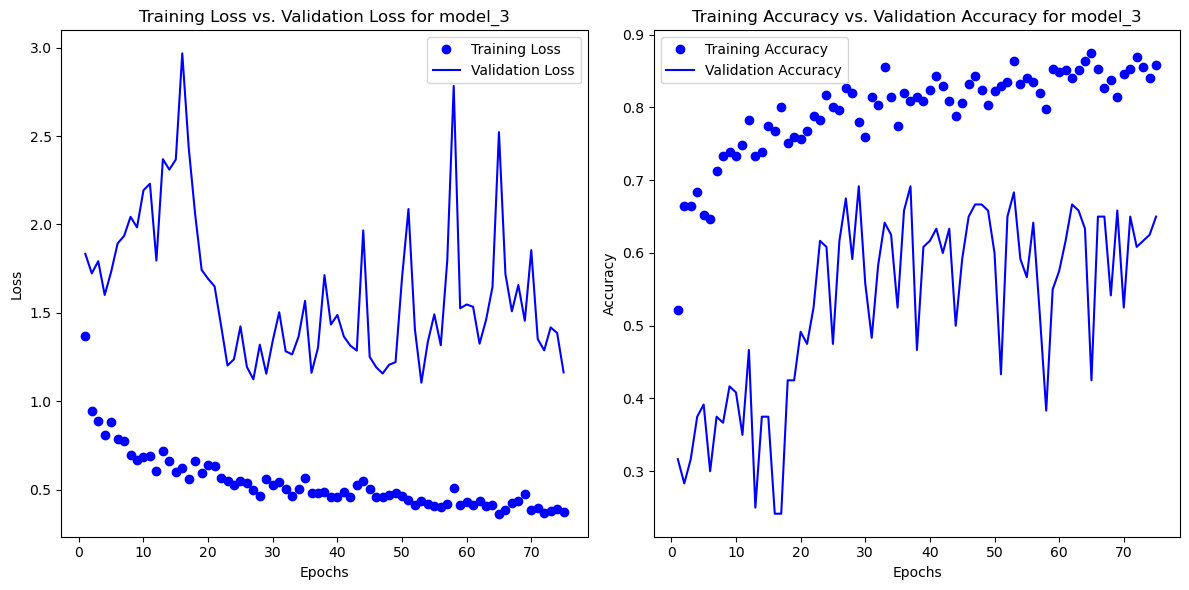

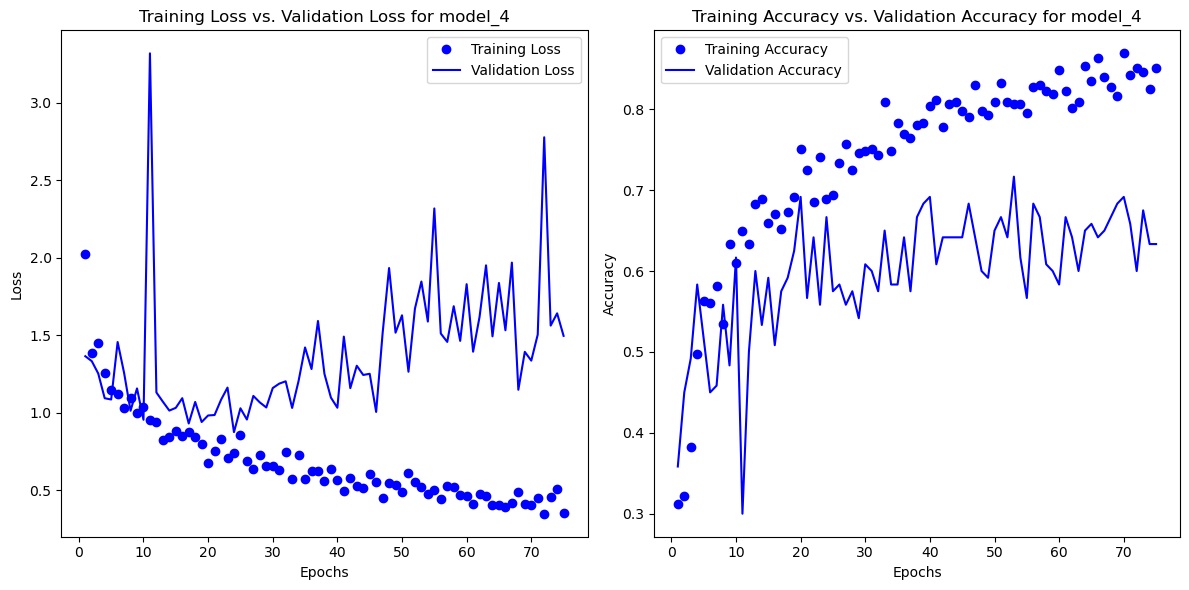

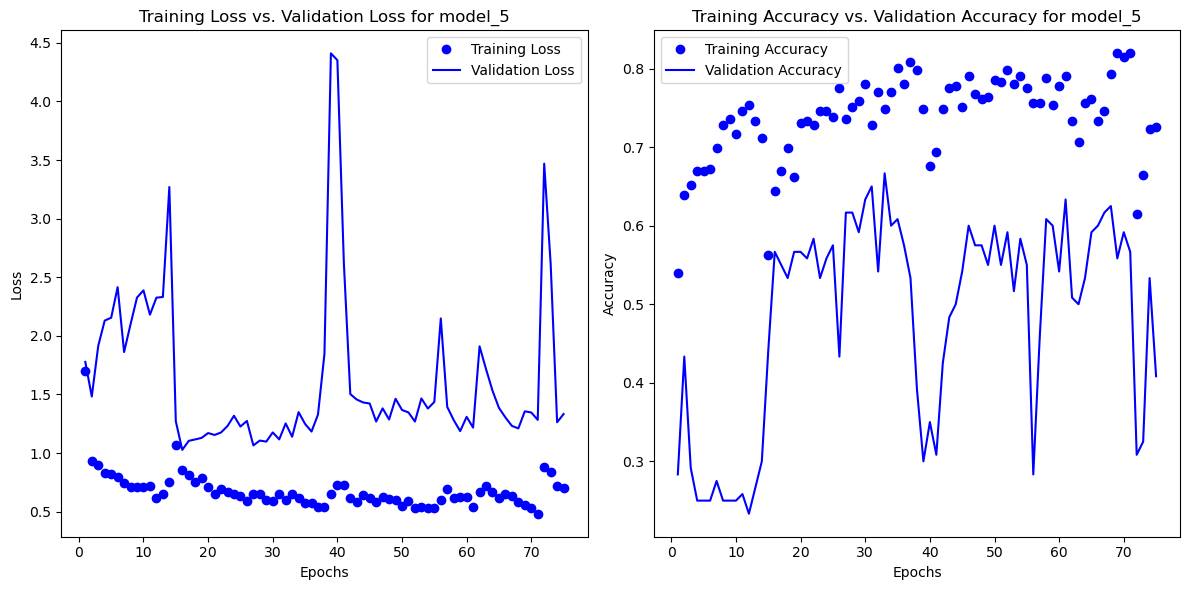

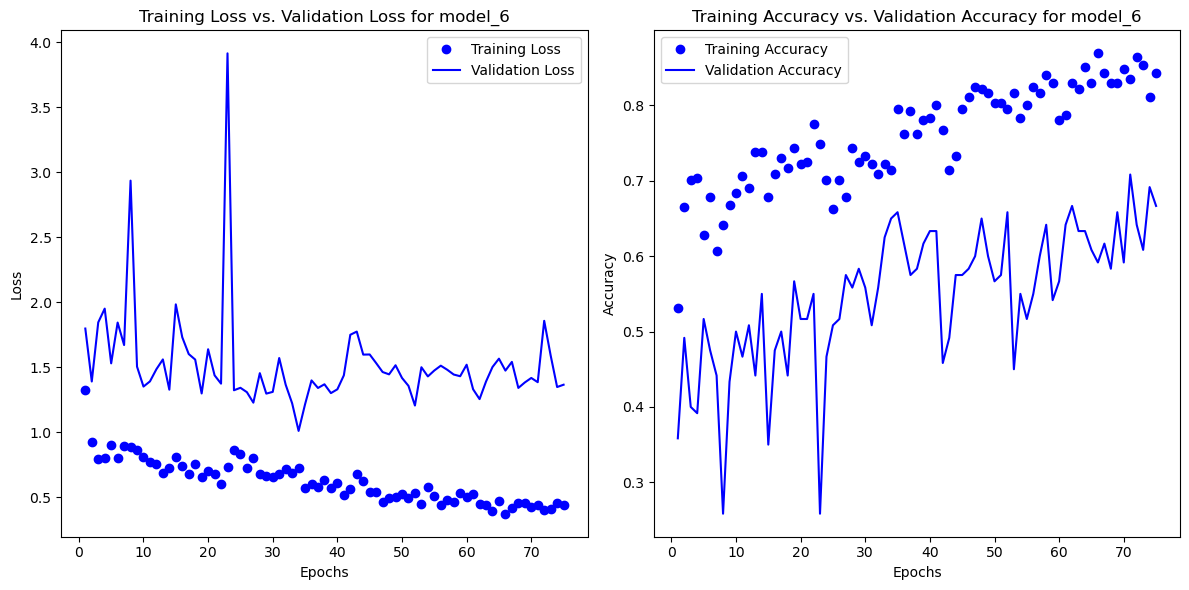

In [16]:
with open('weights/model_1_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#for model 2
with open('weights/model_2_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#for model 3
with open('weights/model_3_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#for model 4
with open('weights/model_4_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#for model 5
with open('weights/model_5_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



#for model 6
with open('weights/model_6_history.pkl', 'rb') as file:
    history = pickle.load(file)


epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss for model_6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for model_6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
def score_model(history):
    val_accuracy = max(history['val_accuracy'])
    val_loss = min(history['val_loss'])

    score = val_accuracy - val_loss 
    return score
import pickle
import numpy as np

# Load model histories
model_histories = []
for i in range(1, 7):
    with open(f'weights/model_{i}_history.pkl', 'rb') as f:
        model_histories.append(pickle.load(f))

# Score each model
scores = [score_model(history) for history in model_histories]
best_model_index = np.argmax(scores)

print(f"Best model is model_{best_model_index + 1}")


Best model is model_4


In [18]:
best_model = model_4
best_model.save("weights/best_model.h5")
print("Best model saved as 'best_model.h5'")

Best model saved as 'best_model.h5'


In [19]:
train_generator.class_indices

{'Blotch_Apple': 0, 'Normal_Apple': 1, 'Rot_Apple': 2, 'Scab_Apple': 3}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


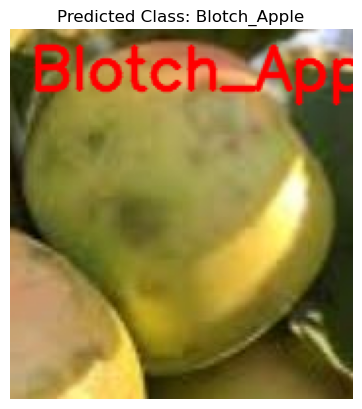

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('weights/best_model.h5')

# Provide the image path
image_path = 'data/Test/Blotch_Apple/test.jpg'

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Stack images and make predictions
images = np.vstack([x])
classes = best_model.predict(images, batch_size=10)

# Class names (change these as per your classes)
class_names = ['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
predicted_class = class_names[np.argmax(classes)]

# Load the original image using OpenCV
original_img = cv2.imread(image_path)
# Convert BGR (OpenCV default) to RGB
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Annotate the image with the predicted class
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(original_img, predicted_class, (10, 30), font, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Display the image
plt.imshow(original_img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Sudee\AppData\Local\Temp\ipykernel_11824\2657246598.py:11: SyntaxWarning: invalid escape sequence '\m'
  with open('weights\model_4_history.pkl', 'rb') as f:
C:\Users\Sudee\AppData\Local\Temp\ipykernel_11824\2657246598.py:18: SyntaxWarning: invalid escape sequence '\T'
  train_dir = 'data\Train'


Found 382 images belonging to 4 classes.


d:\python3.12\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


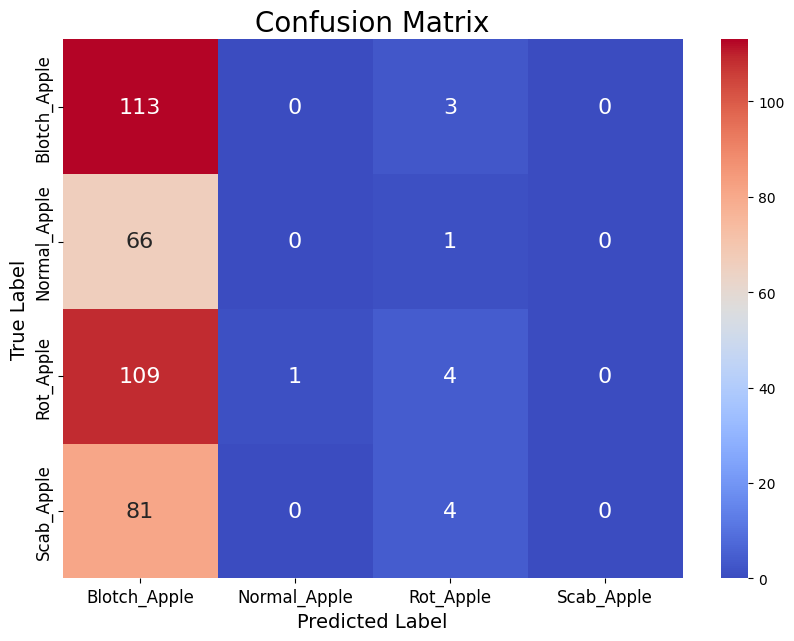

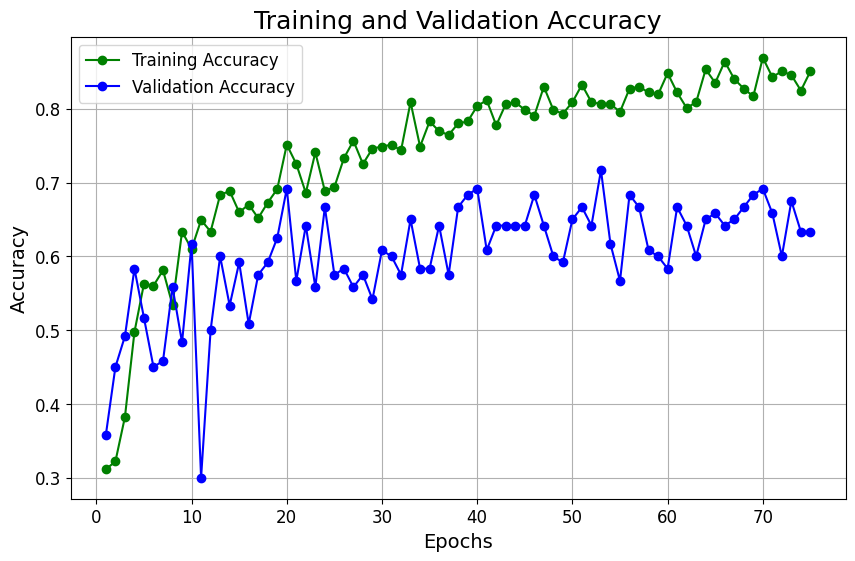

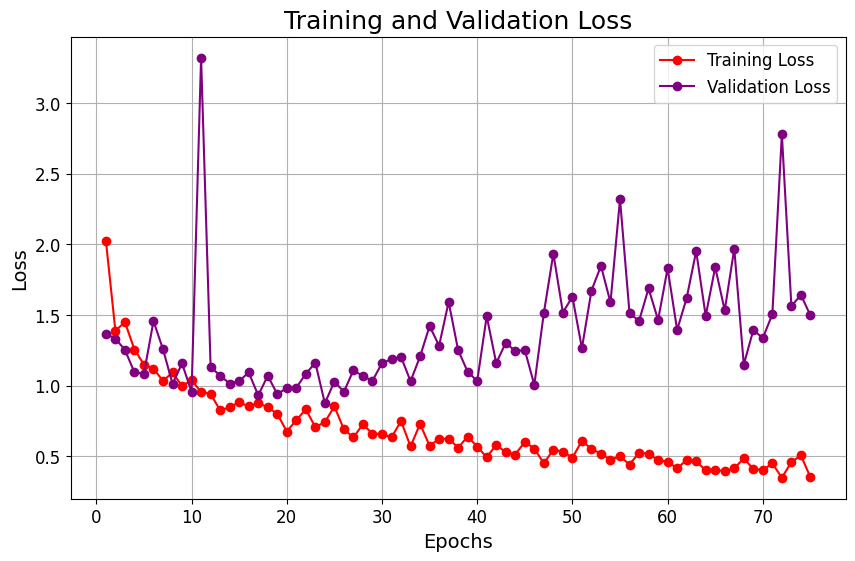

d:\python3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: 


Classification Report:
              precision    recall  f1-score   support

Blotch_Apple       0.31      0.97      0.47       116
Normal_Apple       0.00      0.00      0.00        67
   Rot_Apple       0.33      0.04      0.06       114
  Scab_Apple       0.00      0.00      0.00        85

    accuracy                           0.31       382
   macro avg       0.16      0.25      0.13       382
weighted avg       0.19      0.31      0.16       382



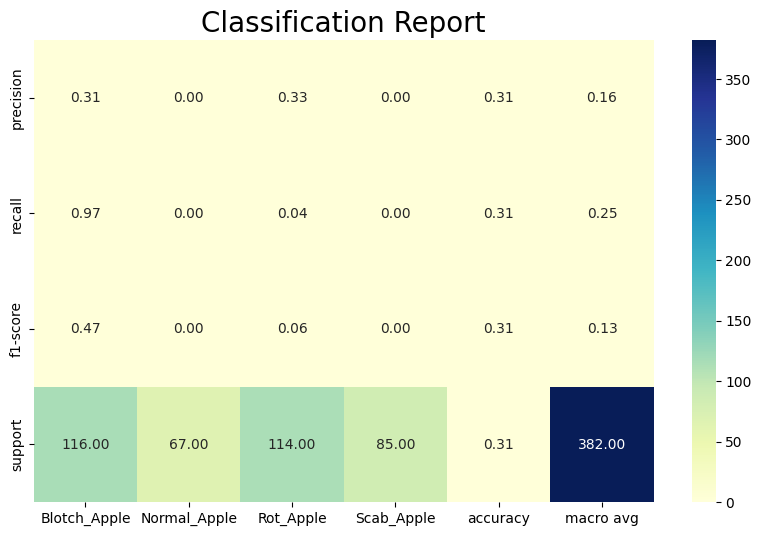

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd

# Load model training history from model4.pkl
with open('weights\model_4_history.pkl', 'rb') as f:
    best_model_history = pickle.load(f)

# Load your best model (from best_model.h5)
model = load_model('weights/best_model.h5')


train_dir = 'data\Train'  
batch_size = 32

# Use ImageDataGenerator for loading test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get true labels
y_true = test_generator.classes

# Predict probabilities using the loaded model
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Enhanced Confusion Matrix Plot
plt.figure(figsize=(10, 7))
class_names = ['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']  # Replace with actual class names

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, 
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Scatter plot for Training and Validation Accuracy over epochs
epochs = range(1, len(best_model_history['accuracy']) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, best_model_history['accuracy'], 'o-', color='green', label='Training Accuracy')
plt.plot(epochs, best_model_history['val_accuracy'], 'o-', color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Scatter plot for Training and Validation Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, best_model_history['loss'], 'o-', color='red', label='Training Loss')
plt.plot(epochs, best_model_history['val_loss'], 'o-', color='purple', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Visualizing Classification Report
class_report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(class_report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f')
plt.title('Classification Report', fontsize=20)
plt.show()
